In [1]:
import cv2
import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [42]:
# We can use pandas to read the text file and take a initial look at what we have
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
poses = pd.read_csv('C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset//poses//02.txt', delimiter=' ', header=None)
print('Shape of position dataframe:', poses.shape)
poses.head()

Shape of position dataframe: (4661, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043683e-12,2.326809e-11,1.110223e-16,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-2.220446e-16
1,0.999997,-2.220141e-03,-1.303943e-03,5.542524e-03,2.223603e-03,0.999994,2.659561e-03,-3.047694e-02,1.298030e-03,-2.662451e-03,0.999996,1.528975e+00
2,0.999992,-3.006968e-03,-2.825820e-03,5.664279e-03,3.016952e-03,0.999989,3.535540e-03,-6.012991e-02,2.815159e-03,-3.544035e-03,0.999990,3.052409e+00
3,0.999989,-2.128535e-03,-4.205819e-03,3.267206e-03,2.141750e-03,0.999993,3.139851e-03,-8.838230e-02,4.199105e-03,-3.148823e-03,0.999986,4.566315e+00
4,0.999983,-1.524541e-03,-5.643893e-03,-6.648871e-03,1.542552e-03,0.999994,3.188330e-03,-1.107150e-01,5.638997e-03,-3.196981e-03,0.999979,6.079413e+00


In [43]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
print('First position:')
first_pose = np.array(poses.iloc[0]).reshape((3,4)).round(2)
first_pose

First position:


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.]])

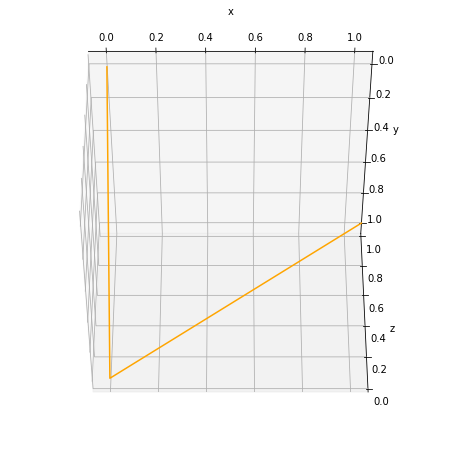

In [44]:
fig = plt.figure(figsize=(12,8)) #adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
ax = fig.add_subplot(111, projection='3d')

ax.plot(first_pose[:, 0], 
        first_pose[:, 1], 
        first_pose[:, 2], label='estimated', color='orange')

# ax.plot(handler.gt[:, :, 3][:, 0], 
#         handler.gt[:, :, 3][:, 1], 
#         handler.gt[:, :, 3][:, 2], label='ground truth')
# ax.set_xlim3d(-5, 5)
# ax.set_ylim3d(-5, 5)
# ax.set_zlim3d(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=-40, azim=270)

In [45]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
gt = np.zeros((len(poses), 3, 4))
for i in range(len(poses)):
    gt[i] = np.array(poses.iloc[i]).reshape((3, 4))
print(gt.size)
print(gt)

55932
[[[ 1.000000e+00  9.043683e-12  2.326809e-11  1.110223e-16]
  [ 9.043683e-12  1.000000e+00  2.392370e-10  3.330669e-16]
  [ 2.326810e-11  2.392370e-10  9.999999e-01 -2.220446e-16]]

 [[ 9.999967e-01 -2.220141e-03 -1.303943e-03  5.542524e-03]
  [ 2.223603e-03  9.999940e-01  2.659561e-03 -3.047694e-02]
  [ 1.298030e-03 -2.662451e-03  9.999956e-01  1.528975e+00]]

 [[ 9.999915e-01 -3.006968e-03 -2.825820e-03  5.664279e-03]
  [ 3.016952e-03  9.999892e-01  3.535540e-03 -6.012991e-02]
  [ 2.815159e-03 -3.544035e-03  9.999897e-01  3.052409e+00]]

 ...

 [[ 6.759954e-01  2.789004e-02 -7.363779e-01  1.234262e+02]
  [ 4.118290e-02  9.962919e-01  7.554012e-02 -2.076716e+01]
  [ 7.357542e-01 -8.139093e-02  6.723401e-01  9.144012e+02]]

 [[ 6.784164e-01  2.585583e-02 -7.342225e-01  1.224460e+02]
  [ 5.179065e-02  9.952111e-01  8.290080e-02 -2.070084e+01]
  [ 7.328498e-01 -9.426710e-02  6.738284e-01  9.153117e+02]]

 [[ 6.808971e-01  2.896301e-02 -7.318062e-01  1.214574e+02]
  [ 5.181616e-02  

In [46]:

gt[1].dot(np.array([0,0,0,1]))

array([ 0.00554252, -0.03047694,  1.528975  ])

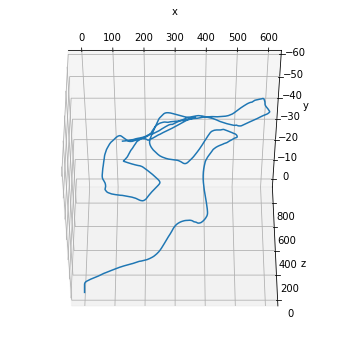

In [47]:
fig = plt.figure(figsize=(7,6))#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
ax = fig.add_subplot(111, projection='3d')
ax.plot(gt[:, :, 3][:, 0], gt[:, :, 3][:, 1], gt[:, :, 3][:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=-40, azim=270)

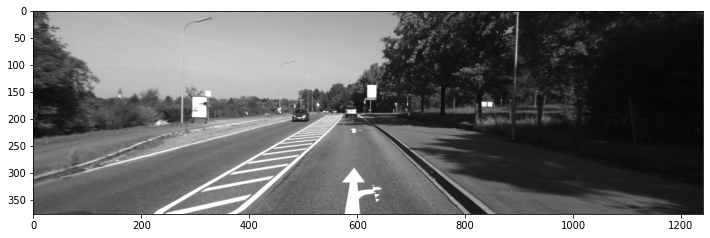

In [48]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
test_img = cv2.imread('C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset/sequences/02/image_0/000000.png')
plt.figure(figsize=(12,6))
plt.imshow(test_img)
plt.savefig("og.png")

In [9]:
# We can see that the timing of the camera is right around 10fps
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
times = pd.read_csv('C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset/sequences/02/times.txt', delimiter=' ', header=None)
times.head()

,0
0,0.000000
1,0.103612
2,0.207353
3,0.311118
4,0.414713


In [10]:
# We can load in our sensor calibration data as follows
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
calib = pd.read_csv('C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset/sequences/02/calib.txt', delimiter=' ', header=None, index_col=0)
calib

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856000,0.000000,607.192800,0.000000,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P1:,718.856000,0.000000,607.192800,-386.144800,0.000000,718.856000,185.215700,0.000000,0.000000,0.000000,1.000000,0.000000
P2:,718.856000,0.000000,607.192800,45.382250,0.000000,718.856000,185.215700,-0.113089,0.000000,0.000000,1.000000,0.003780
P3:,718.856000,0.000000,607.192800,-337.287700,0.000000,718.856000,185.215700,2.369057,0.000000,0.000000,1.000000,0.004915
Tr:,0.000428,-0.999967,-0.008084,-0.011985,-0.007211,0.008081,-0.999941,-0.054040,0.999974,0.000486,-0.007207,-0.292197


In [11]:
# P0 is the projection matrix left grayscale camera
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
P0 = np.array(calib.loc['P0:']).reshape((3,4))
P0

array([[718.856 ,   0.    , 607.1928,   0.    ],
       [  0.    , 718.856 , 185.2157,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]])

In [12]:
# Decomposing a projection matrix with OpenCV
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
P1 = np.array(calib.loc['P1:']).reshape((3,4))
k1, r1, t1, _, _, _, _ = cv2.decomposeProjectionMatrix(P1)
t1 = t1 / t1[3]
print('Intrinsic Matrix:')
print(k1)
print('Rotation Matrix:')
print(r1)
print('Translation Vector:')
print(t1.round(4))

Intrinsic Matrix:
[[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Rotation Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Translation Vector:
[[ 0.5372]
 [ 0.    ]
 [-0.    ]
 [ 1.    ]]


In [13]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
Rt = np.hstack([r1, t1[:3]])
# Now to consider transform the origin of the global frame (0, 0, 0, 1)
origin = np.array([0, 0, 0, 1])
Rt.dot(origin).round(4).reshape(-1,1)

array([[ 0.5372],
       [ 0.    ],
       [-0.    ]])

In [14]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
T_homogeneous = np.vstack([Rt, np.array([0, 0, 0, 1])])
T_hom_inv = np.linalg.inv(T_homogeneous)
print('Homogeneous transformation matrix:')
print(T_homogeneous.round(4))
print('Inverted homogeneous transformation matrix:')
print(T_hom_inv.round(4))

Homogeneous transformation matrix:
[[ 1.      0.      0.      0.5372]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.     -0.    ]
 [ 0.      0.      0.      1.    ]]
Inverted homogeneous transformation matrix:
[[ 1.      0.      0.     -0.5372]
 [ 0.      1.      0.     -0.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]]


In [15]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
some_point = np.array([1, 2, 3, 1]).reshape(-1,1)

transformed_point = gt[14].dot(some_point)
depth_from_cam = transformed_point[2]

print('Original point:\n', some_point)
print('Transformed point:\n', transformed_point.round(4))
print('Depth from camera:\n', depth_from_cam.round(4))

Original point:
 [[1]
 [2]
 [3]
 [1]]
Transformed point:
 [[ 0.2706]
 [ 1.5461]
 [15.0755]]
Depth from camera:
 [15.0755]


In [16]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
P2 = np.array(calib.loc['P2:']).reshape((3,4))
k2, r2, t2, _, _, _, _ = cv2.decomposeProjectionMatrix(P2)
t2 = t2 / t2[3]
print(k2)
print(r2)
print(t2)

[[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.05993858]
 [ 0.00113119]
 [-0.00377976]
 [ 1.        ]]


In [17]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
P3 = np.array(calib.loc['P3:']).reshape((3,4))
k3, r3, t3, _, _, _, _ = cv2.decomposeProjectionMatrix(P3)
t3 = t3 / t3[3]
print(k3)
print(r3)
print(t3)

[[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0.47335236]
 [-0.00202917]
 [-0.00491521]
 [ 1.        ]]


In [18]:
class Dataset_Handler():
    def __init__(self, sequence, progress_bar=True, low_memory=True):
        #adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
        # This will tell odometry functin how to access data from this object
        self.low_memory = low_memory
        
        # Set file paths and get ground truth poses
        self.seq_dir = 'C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset/sequences/{}/'.format(sequence)
        self.poses_dir = 'C://Users//Bhaven//Downloads//Robotics//KITTI_visual_odometry//dataset/poses/{}.txt'.format(sequence)
        poses = pd.read_csv(self.poses_dir, delimiter=' ', header=None)
        
        # Get names of files to iterate through
        self.left_image_files = os.listdir(self.seq_dir + 'image_0')
        self.right_image_files = os.listdir(self.seq_dir + 'image_1')
        self.num_frames = len(self.left_image_files)
        
        # Get calibration details for scene
        # P0 and P1 are Grayscale cams, P2 and P3 are RGB cams
        calib = pd.read_csv(self.seq_dir + 'calib.txt', delimiter=' ', header=None, index_col=0)
        self.P0 = np.array(calib.loc['P0:']).reshape((3,4))
        self.P1 = np.array(calib.loc['P1:']).reshape((3,4))
        self.P2 = np.array(calib.loc['P2:']).reshape((3,4))
        self.P3 = np.array(calib.loc['P3:']).reshape((3,4))
        # This is the transformation matrix for LIDAR
        self.Tr = np.array(calib.loc['Tr:']).reshape((3,4))
        
        # Get times and ground truth poses
        self.times = np.array(pd.read_csv(self.seq_dir + 'times.txt', 
                                          delimiter=' ', 
                                          header=None))
        self.gt = np.zeros((len(poses), 3, 4))
        for i in range(len(poses)):
            self.gt[i] = np.array(poses.iloc[i]).reshape((3, 4))
        
        # Get images and lidar loaded
        if self.low_memory:
            # Will use generators to provide data sequentially to save RAM
            # Use class method to set up generators
            self.reset_frames()
            # Store original frame to memory for testing functions
            self.first_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[0], 0)
            self.first_image_right = cv2.imread(self.seq_dir + 'image_1/' 
                                               + self.right_image_files[0], 0)
            self.second_image_left = cv2.imread(self.seq_dir + 'image_0/' 
                                               + self.left_image_files[1], 0)
           
            self.imheight = self.first_image_left.shape[0]
            self.imwidth = self.first_image_left.shape[1]
            
        else:
            # If RAM is not a concern (>32GB), pass low_memory=False
            if progress_bar:
                import progressbar
                bar = progressbar.ProgressBar(max_value=self.num_frames)
            self.images_left = []
            self.images_right = []
            self.pointclouds = []
            for i, name_left in enumerate(self.left_image_files):
                name_right = self.right_image_files[i]
                self.images_left.append(cv2.imread(self.seq_dir + 'image_0/' + name_left))
                self.images_right.append(cv2.imread(self.seq_dir + 'image_1/' + name_right))
                if progress_bar:
                    bar.update(i+1)
                
            self.imheight = self.images_left[0].shape[0]
            self.imwidth = self.images_left[0].shape[1]
            # Keep consistent instance variable names as when using low_memory
            self.first_image_left = self.images_left[0]
            self.first_image_right = self.images_right[0]
            self.second_image_left = self.images_left[1]
        
    def reset_frames(self):
        # Resets all generators to the first frame of the sequence
        self.images_left = (cv2.imread(self.seq_dir + 'image_0/' + name_left, 0)
                            for name_left in self.left_image_files)
        self.images_right = (cv2.imread(self.seq_dir + 'image_1/' + name_right, 0)
                            for name_right in self.right_image_files)
        pass

In [19]:
# Creating a handler object for low_memory (<32GB) setups:
handler = Dataset_Handler('02')
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry

In [20]:
def compute_left_disparity_map(img_left, img_right, matcher='bm', rgb=False, verbose=False):
    #adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
    '''
    Takes a left and right stereo pair of images and computes the disparity map for the left
    image. Pass rgb=True if the images are RGB.
    
    Arguments:
    img_left -- image from left camera
    img_right -- image from right camera
    
    Optional Arguments:
    matcher -- (str) can be 'bm' for StereoBM or 'sgbm' for StereoSGBM matching
    rgb -- (bool) set to True if passing RGB images as input
    verbose -- (bool) set to True to report matching type and time to compute
    
    Returns:
    disp_left -- disparity map for the left camera image
    
    '''
    # Feel free to read OpenCV documentation and tweak these values. These work well
    sad_window = 6
    num_disparities = sad_window*16
    block_size = 11
    matcher_name = matcher
    
    if matcher_name == 'bm':
        matcher = cv2.StereoBM_create(numDisparities=num_disparities,
                                      blockSize=block_size
                                     )
        
    elif matcher_name == 'sgbm':
        matcher = cv2.StereoSGBM_create(numDisparities=num_disparities,
                                        minDisparity=0,
                                        blockSize=block_size,
                                        P1 = 8 * 3 * sad_window ** 2,
                                        P2 = 32 * 3 * sad_window ** 2,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
                                       )
    if rgb:
        img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
        img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
    start = datetime.datetime.now()
    disp_left = matcher.compute(img_left, img_right).astype(np.float32)/16
    end = datetime.datetime.now()
    if verbose:
        print(f'Time to compute disparity map using Stereo{matcher_name.upper()}:', end-start)
    
    return disp_left

Time to compute disparity map using StereoBM: 0:00:00.016486


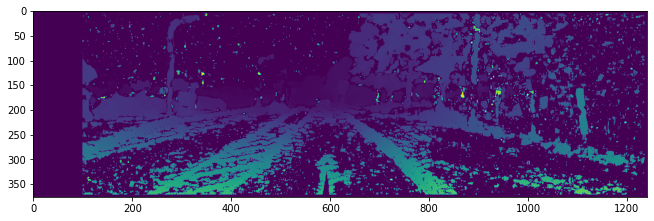

In [49]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
# Compute disparity using StereoBM
disp = compute_left_disparity_map(handler.first_image_left, 
                                  handler.first_image_right, 
                                  matcher='bm',
                                  verbose=True)
plt.figure(figsize=(11,7))
plt.imshow(disp);
plt.savefig("disparity.png")

In [22]:
def decompose_projection_matrix(p):
    #adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
    '''
    Shortcut to use cv2.decomposeProjectionMatrix(), which only returns k, r, t, and divides
    t by the scale, then returns it as a vector with shape (3,) (non-homogeneous)
    
    Arguments:
    p -- projection matrix to be decomposed
    
    Returns:
    k, r, t -- intrinsic matrix, rotation matrix, and 3D translation vector
    
    '''
    k, r, t, _, _, _, _ = cv2.decomposeProjectionMatrix(p)
    t = (t / t[3])[:3]
    
    return k, r, t

In [23]:
#Depth Map
def calc_depth_map(disp_left, k_left, t_left, t_right, rectified=True):
    #adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry

    # Get focal length of x axis for left camera
    f = k_left[0][0]
    
    # Calculate baseline of stereo pair
    if rectified:
        b = t_right[0] - t_left[0] 
    else:
        b = t_left[0] - t_right[0]
        
    # Avoid instability and division by zero
    disp_left[disp_left == 0.0] = 0.1
    disp_left[disp_left == -1.0] = 0.1
    
    # Make empty depth map then fill with depth
    depth_map = np.ones(disp_left.shape)
    depth_map = f * b / disp_left
    
    return depth_map

In [24]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
k_left, r_left, t_left = decompose_projection_matrix(handler.P0)
k_right, r_right, t_right = decompose_projection_matrix(handler.P1)

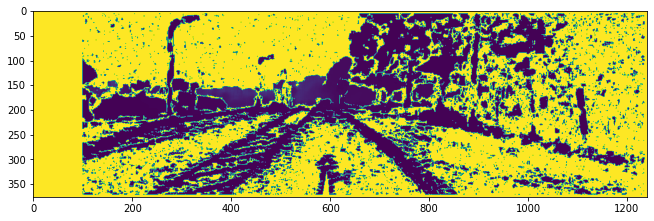

In [25]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
depth = calc_depth_map(disp, k_left, t_left, t_right)
plt.figure(figsize=(11,7))
plt.imshow(depth);

In [26]:
# Knowing the focal length and baseline, we can see that these max values are the result of
# wherever we had -1.0 or 0 disparity, which we turned to 0.1 in the depth map function to
# avoid instability or division by zero, shown below:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
k_left[0][0] * (t_right[0] - t_left[0]) / 0.1

array([3861.448])

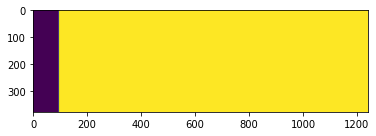

In [27]:
# We can constuct a mask using this information like so
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
mask = np.zeros(handler.first_image_left.shape[:2], dtype=np.uint8)
ymax = handler.first_image_left.shape[0]
xmax = handler.first_image_left.shape[1]
cv2.rectangle(mask, (96,0), (xmax,ymax), (255), thickness = -1)
plt.imshow(mask);

In [28]:
# Let's make an all-inclusive function to get the depth from an incoming set of stereo images
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
def stereo_2_depth(img_left, img_right, P0, P1, matcher='bm', rgb=False, verbose=False, 
                   rectified=True):

    # Compute disparity map
    disp = compute_left_disparity_map(img_left, 
                                      img_right, 
                                      matcher=matcher, 
                                      rgb=rgb, 
                                      verbose=verbose)
    # Decompose projection matrices
    k_left, r_left, t_left = decompose_projection_matrix(P0)
    k_right, r_right, t_right = decompose_projection_matrix(P1)
    # Calculate depth map for left camera
    depth = calc_depth_map(disp, k_left, t_left, t_right)
    
    return depth

In [29]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
def extract_features(image, detector='sift', mask=None):

    if detector == 'sift':
        det = cv2.SIFT_create()
    elif detector == 'orb':
        det = cv2.ORB_create()
    elif detector == 'surf':
        det = cv2.xfeatures2d.SURF_create()
        
    kp, des = det.detectAndCompute(image, mask)
    
    return kp, des

In [30]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
def match_features(des1, des2, matching='BF', detector='sift', sort=True, k=2):

    if matching == 'BF':
        if detector == 'sift':
            matcher = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)
        elif detector == 'orb':
            matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2, crossCheck=False)
        matches = matcher.knnMatch(des1, des2, k=k)
    elif matching == 'FLANN':
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)
        matches = matcher.knnMatch(des1, des2, k=k)
    
    if sort:
        matches = sorted(matches, key = lambda x:x[0].distance)

    return matches

In [31]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
def filter_matches_distance(matches, dist_threshold):

    filtered_match = []
    for m, n in matches:
        if m.distance <= dist_threshold*n.distance:
            filtered_match.append(m)

    return filtered_match

In [39]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
def visualize_matches(image1, kp1, image2, kp2, match):

    image_matches = cv2.drawMatches(image1, kp1, image2, kp2, match, None, flags=2)
    plt.figure(figsize=(16, 6), dpi=100)
    plt.imshow(image_matches)

Time to compute disparity map using StereoBM: 0:00:00.014957
Number of matches before filtering: 1684
Number of matches after filtering: 179


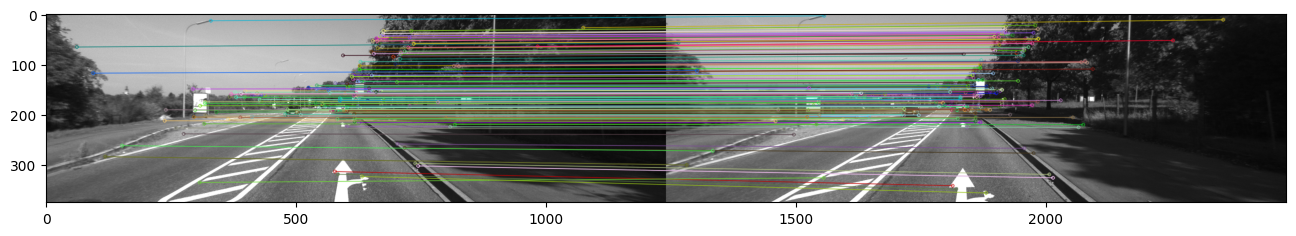

In [41]:
#adapted from https://github.com/FoamoftheSea/KITTI_visual_odometry
# Now to see the difference with 'bm' matcher
image_left = handler.first_image_left
image_right = handler.first_image_right
image_plus1 = handler.second_image_left
depth = stereo_2_depth(image_left, 
                       image_right, 
                       handler.P0, 
                       handler.P1,
                       matcher='bm',
                       verbose=True)
kp0, des0 = extract_features(image_left, 'sift')
kp1, des1 = extract_features(image_plus1, 'sift')
matches = match_features(des0, des1, matching='BF', detector='sift', sort=True)
print('Number of matches before filtering:', len(matches))
matches = filter_matches_distance(matches, 0.3)
print('Number of matches after filtering:', len(matches))
visualize_matches(image_left, kp0, image_plus1, kp1, matches)
plt.savefig("feature.png")